# Basic Numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
# 1. Simular lanzamiento de un dado equilibrado
# la librería clave es numpy
die_roll = np.random.randint(1,7)
die_roll

5

In [3]:
# 2. Simulo el lanzamiento de una moneda 10 veces
coin_flip = np.random.randint(0,2,10)
coin_flip

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [4]:
# 3. A partir de un lanzamiento, obtengo la frecuencia de caras (1)
def freq_flip(coin_flip):
    return sum(coin_flip)/len(coin_flip)

freq_flip(coin_flip)

0.9

In [5]:
# 4. Observo la frecuencia observada, pero para cada vez más lanzamientos

np.random.seed(0)
coin_flips = []
frequencies = []

for _ in range(1000):
    coin_flips.append(np.random.randint(0,2))
    frequencies.append(freq_flip(coin_flips))

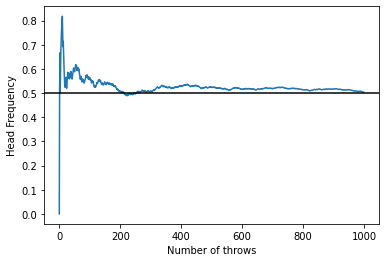

In [10]:
# 5. Grafico freciencias
plt.plot(list(range(1000)),frequencies)
plt.axhline(y=0.5, color = "k")
plt.xlabel('Number of throws')
plt.ylabel('Head Frequency')
plt.show()